<a href="https://colab.research.google.com/github/duyguaran/graduation_thesis/blob/main/CNN_fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import cv2
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/kaggle/fruits-360'):
    for filename in filenames:
        os.path.join(dirname, filename)
#it takes about 2 min

# **Loading Data set**

In [ ]:
train = '/kaggle/input/fruits/fruits-360/Training/'
test =  '/kaggle/input/fruits/fruits-360/Test/'

In [ ]:
fruits = []
fruits_image = []
import os 
for i in os.listdir(train):
    for image_filename in os.listdir(train + i):
        fruits.append(i) # name of the fruit 
        fruits_image.append(i + '/' + image_filename) # image of the fruit

# **Examine Data**


In [ ]:
fruits_train = pd.DataFrame(fruits, columns=["Fruits Name"])
fruits_train["Fruits Image"] = fruits_image

In [ ]:
fruits_train #make data more legible

,Fruits Name,Fruits Image
0,Quince,Quince/r_305_100.jpg
1,Quince,Quince/139_100.jpg
2,Quince,Quince/128_100.jpg
3,Quince,Quince/r_239_100.jpg
4,Quince,Quince/185_100.jpg
...,...,...
67687,Tomato 2,Tomato 2/129_100.jpg
67688,Tomato 2,Tomato 2/r2_144_100.jpg
67689,Tomato 2,Tomato 2/9_100.jpg
67690,Tomato 2,Tomato 2/87_100.jpg


In [ ]:
from collections import Counter
newData = Counter(fruits_train["Fruits Name"])
common_fruits = newData.most_common(10)
print("The 10 most frequently found fruits in the data set and their number")
common_fruits

The 10 most frequently found fruits in the data set and their number


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Tomato 1', 738),
 ('Cherry 2', 738),
 ('Tomato 3', 738),
 ('Melon Piel de Sapo', 738),
 ('Peach 2', 738),
 ('Cherry Rainier', 738),
 ('Strawberry Wedge', 738),
 ('Walnut', 735)]

In [ ]:
x,y = zip(*common_fruits)
x,y = list(x),list(y)

In [ ]:
print(x)
print(y)

['Grape Blue', 'Plum 3', 'Tomato 1', 'Cherry 2', 'Tomato 3', 'Melon Piel de Sapo', 'Peach 2', 'Cherry Rainier', 'Strawberry Wedge', 'Walnut']
[984, 900, 738, 738, 738, 738, 738, 738, 738, 735]


In [ ]:
print("The 10  most frequently found fruits in the dataset\n ", x)

The 10  most frequently found fruits in the dataset
  ['Grape Blue', 'Plum 3', 'Tomato 1', 'Cherry 2', 'Tomato 3', 'Melon Piel de Sapo', 'Peach 2', 'Cherry Rainier', 'Strawberry Wedge', 'Walnut']


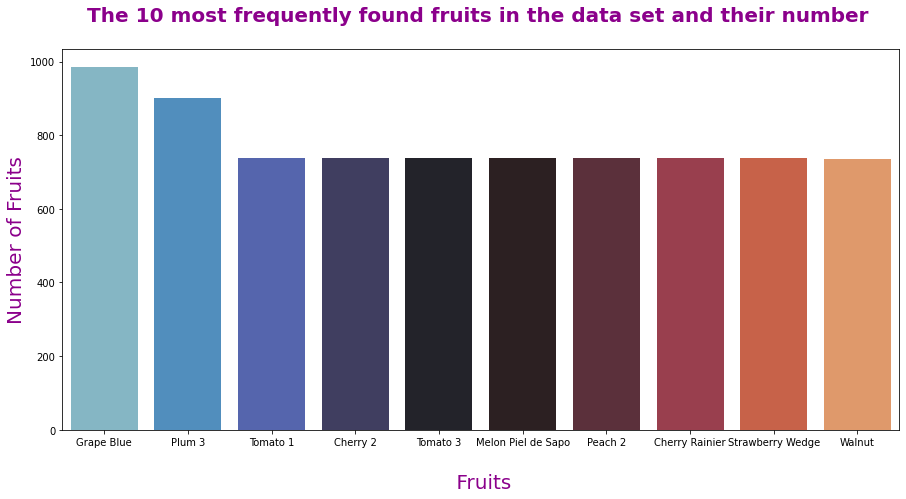

In [ ]:
plt.figure(figsize=(15,7))
ax= sns.barplot(x=x, y=y, palette="icefire") 
plt.xlabel('\n Fruits',fontsize=20,color="darkmagenta") 
plt.ylabel('Number of Fruits',fontsize=20,color="darkmagenta")
plt.xticks(rotation = 0)
plt.title('The 10 most frequently found fruits in the data set and their number \n',color="darkmagenta",fontsize=20,fontweight = 'bold') 
plt.show()

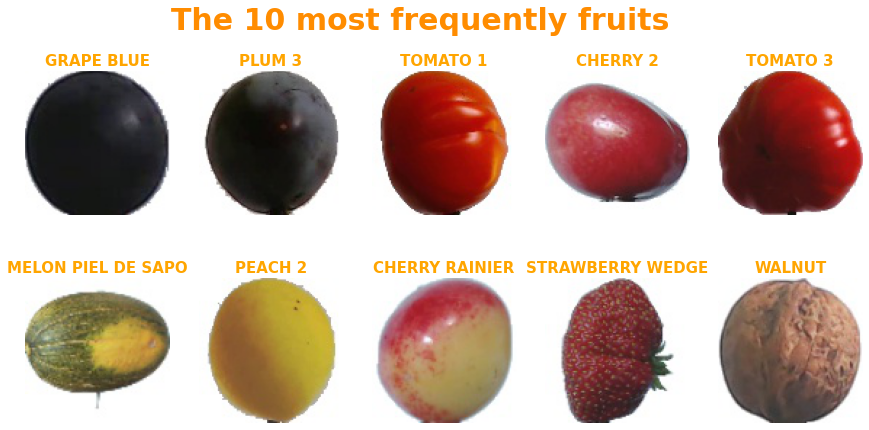

In [ ]:
plt.figure(figsize=(15,7))
number_of_class = len(x)

for i in range(number_of_class):
    fruits = fruits_train[fruits_train["Fruits Name"] == x[i]]["Fruits Image"].values [1]
    
    plt.subplot(2,5,i+1)
    img = load_img(train + fruits)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "orange", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("The 10 most frequently fruits  \n", fontsize = 30 , color = "darkorange", fontweight = 'bold')
plt.show()

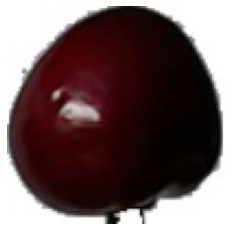

In [ ]:
img= load_img(train + "Cherry 1/109_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

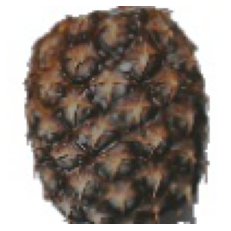

In [ ]:
img_test = load_img(test + "Pineapple/144_100.jpg", target_size=(100,100))
plt.imshow(img_test)
plt.axis("off")
plt.show()

In [ ]:
array_image = img_to_array(img)
print("Image Shape", array_image.shape)

Image Shape (100, 100, 3)


In [ ]:
fruitCountUnique = glob(train + '/*' )
numberOfClass = len(fruitCountUnique)
print("There are",numberOfClass, "different fruit classes ")

There are 131 different fruit classes 


# **Creating CNN Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = array_image.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten()) #düzleştirme
model.add(Dense(1024))#hidden layer
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output 
model.add(Activation("softmax")) # softmax for output classification

# **Compile Model**

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

# **Determining epoch and batch size**

In [ ]:
epochs = 100  
batch_size = 32

In [ ]:
print("Target Size:", array_image.shape[:2])

Target Size: (100, 100)


# **Data Augmentation**

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 67692 images belonging to 131 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        test, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22688 images belonging to 131 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print("data batch shape: ",data_batch.shape)
    print("labels batch shape: ",labels_batch.shape)
    break

data batch shape:  (32, 100, 100, 3)
labels batch shape:  (32, 131)


# **Fit the model**

In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

Epoch 1/100
50/50 [==============================] - 26s 511ms/step - loss: 3.4707 - accuracy: 0.1506 - val_loss: 2.8741 - val_accuracy: 0.2800
Epoch 2/100
50/50 [==============================] - 25s 500ms/step - loss: 2.8538 - accuracy: 0.2350 - val_loss: 2.0723 - val_accuracy: 0.4112
Epoch 3/100
50/50 [==============================] - 25s 501ms/step - loss: 2.3083 - accuracy: 0.3487 - val_loss: 1.5923 - val_accuracy: 0.5200
Epoch 4/100
50/50 [==============================] - 25s 498ms/step - loss: 2.0050 - accuracy: 0.4087 - val_loss: 1.4060 - val_accuracy: 0.5875
Epoch 5/100
50/50 [==============================] - 25s 491ms/step - loss: 1.6546 - accuracy: 0.4844 - val_loss: 1.2580 - val_accuracy: 0.6250
Epoch 6/100
50/50 [==============================] - 24s 488ms/step - loss: 1.5599 - accuracy: 0.5219 - val_loss: 1.2742 - val_accuracy: 0.6175
Epoch 7/100
50/50 [==============================] - 24s 473ms/step - loss: 1.2420 - accuracy: 0.6225 - val_loss: 1.3216 - val_accuracy:

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# **Evaluate the Model**

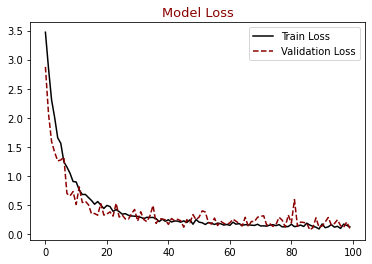

In [ ]:
#loss chart
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

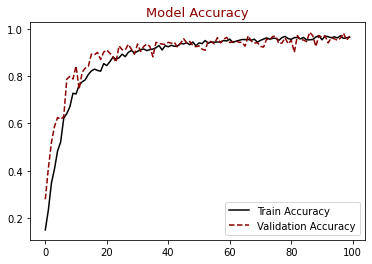

In [ ]:
#accuracy chart
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()